In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

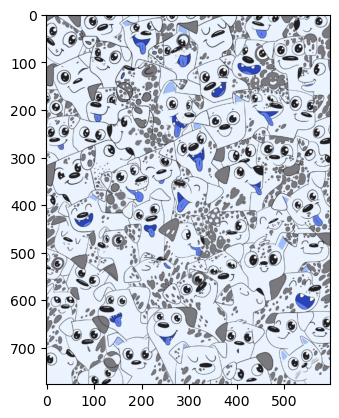

In [2]:
image = cv2.imread(r'C:\Users\ASUS\Desktop\UET\Image Processing\Finding-Counting-ImageSet\Finding\2\2.png')
plt.imshow(image)

In [3]:
object_list = [
    r"C:\Users\ASUS\Desktop\UET\Image Processing\Finding-Counting-ImageSet\Finding\2\ball.png",
    r"C:\Users\ASUS\Desktop\UET\Image Processing\Finding-Counting-ImageSet\Finding\2\bone.png",
    r"C:\Users\ASUS\Desktop\UET\Image Processing\Finding-Counting-ImageSet\Finding\2\bug.png",
    r"C:\Users\ASUS\Desktop\UET\Image Processing\Finding-Counting-ImageSet\Finding\2\butter.png",
    r"C:\Users\ASUS\Desktop\UET\Image Processing\Finding-Counting-ImageSet\Finding\2\butterfly.png",
    r"C:\Users\ASUS\Desktop\UET\Image Processing\Finding-Counting-ImageSet\Finding\2\candy.png",
    r"C:\Users\ASUS\Desktop\UET\Image Processing\Finding-Counting-ImageSet\Finding\2\chicken.png",
    r"C:\Users\ASUS\Desktop\UET\Image Processing\Finding-Counting-ImageSet\Finding\2\cloud.png",
    r"C:\Users\ASUS\Desktop\UET\Image Processing\Finding-Counting-ImageSet\Finding\2\ice_cream.png",
    r"C:\Users\ASUS\Desktop\UET\Image Processing\Finding-Counting-ImageSet\Finding\2\ice_cream2.png",
    r"C:\Users\ASUS\Desktop\UET\Image Processing\Finding-Counting-ImageSet\Finding\2\strawberry.png",
    r"C:\Users\ASUS\Desktop\UET\Image Processing\Finding-Counting-ImageSet\Finding\2\tie.png",
]

In [4]:
output_image = image.copy()

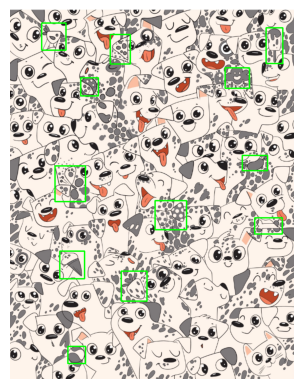

In [5]:
scales = np.linspace(0.5, 1, 10)

for object_path in object_list:
    template = cv2.imread(object_path)

    max_val_global = -1
    best_match_loc = None
    best_scale = None
    best_w, best_h = None, None

    for scale in scales:
        resized_template = cv2.resize(template, (0, 0), fx=scale, fy=scale)

        w, h = resized_template.shape[1], resized_template.shape[0]

        if w > image.shape[1] or h > image.shape[0]:
            continue

        result = cv2.matchTemplate(image, resized_template, cv2.TM_CCOEFF_NORMED)

        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

        if max_val > max_val_global:
            max_val_global = max_val
            best_match_loc = max_loc
            best_scale = scale
            best_w, best_h = w, h

    if best_match_loc is not None:
        top_left = best_match_loc
        bottom_right = (top_left[0] + best_w, top_left[1] + best_h)
        cv2.rectangle(output_image, top_left, bottom_right, (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()